In [6]:
# coding: utf-8
# [Python高速化　Numba入門　その１ - tkm2261's blog](http://yutori-datascience.hatenablog.com/entry/2014/12/09/235628)

import numpy as np
from numba import double
from numba.decorators import jit
import time

@jit
def pairwise_numba(X, D):
    M = X.shape[0]
    N = X.shape[1]
    for i in range(M):
        for j in range(M):
            d = 0.0
            for k in range(N):
                tmp = X[i, k] - X[j, k]
                d += tmp * tmp
            D[i, j] = np.sqrt(d)

def pairwise_python(X, D):
    M = X.shape[0]
    N = X.shape[1]
    for i in range(M):
        for j in range(M):
            d = 0.0
            for k in range(N):
                tmp = X[i, k] - X[j, k]
                d += tmp * tmp
            D[i, j] = np.sqrt(d)

if __name__ == '__main__':
    t1 = time.time()
    X = np.random.random((1000, 3))
    D = np.empty((1000, 1000))
    pairwise_python(X, D)
    print("python: " + str(time.time() - t1))
    
    t2 = time.time()
    X = np.random.random((1000, 3))
    D = np.empty((1000, 1000))
    pairwise_numba(X, D)
    print("numba: " + str(time.time() - t2))

python: 2.6567459106445312
numba: 0.1251530647277832


In [8]:
%%timeit

X = np.random.random((1000, 3))
D = np.empty((1000, 1000))
pairwise_python(X, D)

1 loop, best of 3: 2.49 s per loop


In [9]:
%%timeit

X = np.random.random((1000, 3))
D = np.empty((1000, 1000))
pairwise_numba(X, D)

100 loops, best of 3: 3.99 ms per loop


In [13]:
# [JITコンパイラライブラリNumbaを使ってPythonコードを劇的に高速化する方法 - MyEnigma](http://myenigma.hatenablog.com/entry/2017/03/02/155433)
from numba import jit
import numpy as np
import time

@jit
def sum2d(arr):
    M, N = arr.shape
    result = 0.0
    for i in range(M):
        for j in range(N):
            result += arr[i, j]
    return result

start = time.time()
a = np.arange(100000000).reshape(10000, 10000)
print(sum2d(a))
elapsed_time = time.time() - start
print("elapsed_time: {0}".format(elapsed_time) + "[sec]")

4999999950000000.0
elapsed_time: 0.5923340320587158[sec]


In [16]:
import numpy as np
size = 200
iterations = 100

def mandelbrot_python(m, size, iterations):
    for i in range(size):
        for j in range(size):
            c = -2 + 3./size*j + 1j*(1.5 - 3./size*i)
            z = 0
            for n in range(iterations):
                if np.abs(z) <= 10:
                    z = z*z + c
                    m[i, j] = n
                else:
                    break

In [17]:
m = np.zeros((size, size))
mandelbrot_python(m, size, iterations)

([], <a list of 0 Text yticklabel objects>)

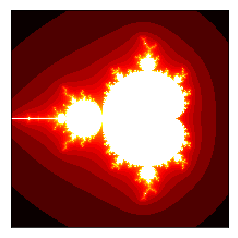

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(np.log(m), cmap=plt.cm.hot)
plt.xticks([]) 
plt.yticks([])

In [26]:
%%timeit m = np.zeros((size, size))
mandelbrot_python(m, size, iterations)

1 loop, best of 3: 1.49 s per loop


In [30]:
import numba
from numba import jit, complex128

@jit
def mandelbrot_numba(m, size, iterations):
    for i in range(size):
        for j in range(size):
            c = -2 + 3./size*j + 1j*(1.5 - 3./size*i)
            z = 0
            for n in range(iterations):
                if np.abs(z) <= 10:
                    z = z*z + c
                    m[i, j] = n
                else:
                    break

In [31]:
%%timeit m = np.zeros((size, size))
mandelbrot_numba(m, size, iterations)

The slowest run took 24.56 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 5.33 ms per loop


In [32]:
import numba
from numba import jit, complex128

@jit(locals=dict(c=complex128, z=complex128))
def mandelbrot_numba2(m, size, iterations):
    for i in range(size):
        for j in range(size):
            c = -2 + 3./size*j + 1j*(1.5 - 3./size*i)
            z = 0
            for n in range(iterations):
                if np.abs(z) <= 10:
                    z = z*z + c
                    m[i, j] = n
                else:
                    break

In [33]:
%%timeit m = np.zeros((size, size))
mandelbrot_numba(m, size, iterations)

100 loops, best of 3: 5.02 ms per loop
